# Informações sobre a base de dados

Este arquivo contém dados abrangentes do programa de fidelidade da companhia aérea, abrangendo a campanha promocional, inclui detalhes sobre inscrição no programa, cancelamentos e informações adicionais do cliente.



A companhia aérea implementou uma campanha promocional, com o objetivo de potenciar a adesão ao programa. O conjunto de dados abrange informações sobre inscrições, inscrições, cancelamentos no programa de fidelidade e dados demográficos complementares dos clientes.

# Fazendo consultas SQL - para extrair os dados


In [1]:
#importando bibliotecas e conectando o banco de dados
import sqlite3 as sl3
import pandas as pd
#usar comando conn da biblioteca sqlite para conectar com o banco de dados
conn = sl3.connect("database.db")

In [2]:
#consulta dos dados no banco de dados
consulta_atividade= "SELECT * FROM flight_activity"
df_atividade = pd.read_sql_query(consulta_atividade, conn)

In [3]:
#fechando a conexão com o banco de dados
# conn.close()

In [4]:
df_atividade.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0


# Preparação dos dados - aprendendo a ferramenta de Machine Learning

In [5]:
type(df_atividade)

pandas.core.frame.DataFrame

In [6]:
#Numero de dados faltantes em cada coluna
df_atividade.isna().sum()

# selecionar somente as colunas que contem numeros

colunas = ['loyalty_number','year','month','flights_booked','flights_with_companions','total_flights','distance','points_accumulated','points_redeemed']

df_colunas_numericas = df_atividade.loc[:, colunas]

# remover as linhas que contem dados faltantes
df_dados_completos = df_colunas_numericas.dropna()

# verificar se exstem dados faltantes
df_dados_completos.isna().sum()



loyalty_number             0
year                       0
month                      0
flights_booked             0
flights_with_companions    0
total_flights              0
distance                   0
points_accumulated         0
points_redeemed            0
dtype: int64

In [7]:
df_dados_completos.shape[0]

405624

# Machine Learning

## Treinando o algoritmo


In [8]:
df_dados_completos.head(6)

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed
0,100018,2017,1,3,0,3,1521,152.0,0
1,100102,2017,1,10,4,14,2030,203.0,0
2,100140,2017,1,6,0,6,1200,120.0,0
3,100214,2017,1,0,0,0,0,0.0,0
4,100272,2017,1,0,0,0,0,0.0,0
5,100301,2017,1,0,0,0,0,0.0,0


In [9]:
from sklearn import tree as tr

x_atributos = df_dados_completos.drop(columns="loyalty_number")
y_rotulo = df_dados_completos.loc[:,"loyalty_number"]

#definicao do algoritmo dphet = profundidade
modelo = tr.DecisionTreeClassifier(max_depth=2)
#depth=2, quantidade de niveis da arvore

#treinamento do algoritmo fit = ajuste
modelo_treinado = modelo.fit(x_atributos, y_rotulo)

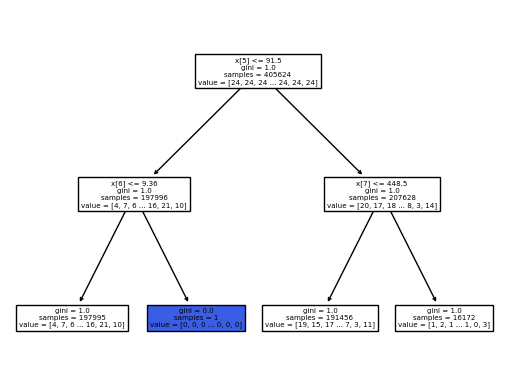

In [10]:
tr.plot_tree(modelo_treinado, filled = True);
#criaçao de um algoritmo capaz de identificar as decisoes , arvore

## Apresentando o resultado

In [11]:
y_rotulo.head()

0    100018
1    100102
2    100140
3    100214
4    100272
Name: loyalty_number, dtype: int64

In [12]:
x_novo = x_atributos.sample()
previsao= modelo_treinado.predict_proba(x_novo)
print ('Proba - 1: {:.2f} - Probab - 2:{:.2f}, Probab - 3 {:.2f}'.format(100*previsao[0][0], 100*previsao[0][1], 100*previsao[0][2]))


Proba - 1: 0.00 - Probab - 2:0.00, Probab - 3 0.00


# Painel de visualização

In [36]:
# verificando o minimum da coluna
x_atributos.loc[:, "points_accumulated"].min()


0.0

In [37]:
# verificando o maximum da coluna
x_atributos.loc[:, "points_accumulated"].max()

676.5

In [ ]:
# instalar a biblioteca
#!pip install gradio

In [38]:
#biblioteca para fazer o painel de visualização
import gradio as gr
import numpy as np


In [41]:
def predict (*args):
  #ajeitar a coluna
  x_novo = np.array([args]).reshape(1,-1)
  previsao= modelo_treinado.predict_proba(x_novo)

  return{"Proba - 1":previsao[0][0], "Probab - 2":previsao[0][1],"Probab - 3":previsao[0][2]}




with gr.Blocks() as demo:
#fazendo o titulo do painel
  gr.Markdown(""" # Propensão de Compra""")

  #estrutura de colunas e linhas
  with gr.Row():
    with gr.Column():
      gr.Markdown(""" # Coluna 1 """)
      #criando a barra de deslizar com valores minimum e max
      year= gr.Slider(label="year", minimum=2017, maximum=2018, step=1, randomize= True)
      month= gr.Slider(label="month", minimum=1, maximum=12, step=1, randomize= True)
      flights_booked= gr.Slider(label="flights_booked", minimum=0, maximum=21, step=1, randomize= True)
      flights_with_companions= gr.Slider(label="flights_with_companion", minimum=0, maximum=11, step=1, randomize= True)
      total_flights=gr.Slider(label="total_flights", minimum=0, maximum=32, step=1, randomize= True)
      distance= gr.Slider(label="distance", minimum=0, maximum=6293, step=1, randomize= True)
      points_accumulated=gr.Slider(label="points_accumulated", minimum=0.0, maximum=676.5, step=1, randomize= True)

      with gr.Row():
        gr.Markdown(""" # Linha 1 """)

        with gr.Row():
          gr.Markdown(""" # Linha 1 """)
          predict_btn=gr.Button(value="Previsão")

    with gr.Column():
      gr.Markdown(""" # Coluna 2 """)
      label = gr.Label()


# #botao predict
  predict_btn.click(
    fn= predict,
    inputs=[
        year,
        month,
        flights_booked,
        flights_with_companions,
        total_flights,
        distance,
        points_accumulated],

    outputs=[label])


#fazer o lançamento do painel principal
demo.launch(debug=True, share=False)





Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.
